In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis = 1)


In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.33, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
test_predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
MAE = mean_absolute_error(y_test, test_predictions)

In [19]:
MSE = mean_squared_error(y_test, test_predictions)

In [20]:
RMSE = np.sqrt(MSE)

In [21]:
print(MAE, MSE, RMSE)

0.5475837919149544 0.4603062493888132 0.6784587307926793


In [22]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [26]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [27]:
train_rmse_errors

[1.5526939990087727,
 0.6057702019226605,
 0.4756847293184344,
 0.37429879089338153,
 0.24108757572467526,
 0.19499374154038498,
 3.548002510099389,
 0.11467946704992606,
 0.11468750277640435]

In [28]:
test_rmse_errors


[1.9307843822347204,
 0.6784587307926793,
 0.5148267621764769,
 1.2750589277149755,
 6.410777533188872,
 24.590944896556948,
 552.5927538784539,
 9287.584356443449,
 185160.259812495]

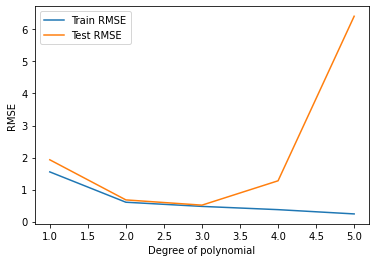

In [30]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of polynomial')
plt.legend()

In [31]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)
final_model = LinearRegression()


In [32]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [33]:
from joblib import dump, load

In [34]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [37]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [38]:
loaded_model = load('final_poly_model.joblib')

In [39]:
loaded_converter = load('final_converter.joblib')

In [41]:
campaign = [[149, 22, 12]]

In [44]:
transformed_data = loaded_converter.fit_transform(campaign)

In [46]:
loaded_model.predict(transformed_data)

array([14.64501014])